In [4]:
import pandas as pd

# 1. LOAD DATA
deg = pd.read_csv("degree_annual.csv")

# 2. STANDARDIZE COLUMN NAMES
deg.columns = (
    deg.columns
    .str.lower()      # make all lowercase
    .str.strip()      # remove spaces at edges
)

# 3. BASIC INFO (OPTIONAL – just to inspect)
print(deg.head())
print(deg.dtypes)

# 4. DROP COMPLETELY DUPLICATE ROWS
deg = deg.drop_duplicates()

# 5. DROP ROWS MISSING KEY IDENTIFIERS
# these are core CPS/IPUMS identifiers
required_cols = ["year", "serial", "pernum"]
deg = deg.dropna(subset=required_cols)

# 6. CONVERT TYPES (SAFE)
int_cols = ["year", "serial", "month", "asecflag", "pernum", "educ"]
for col in int_cols:
    if col in deg.columns:
        deg[col] = pd.to_numeric(deg[col], errors="coerce").astype("Int64")

float_cols = ["asecwth", "asecwt"]
for col in float_cols:
    if col in deg.columns:
        deg[col] = pd.to_numeric(deg[col], errors="coerce")

# 7. SIMPLE FILTERS (OPTIONAL)
# keep only valid years (change as needed)
deg = deg[(deg["year"] >= 2000) & (deg["year"] <= 2025)]

# 8. OPTIONAL: CREATE "BA OR HIGHER" FLAG FROM EDUC
# In IPUMS CPS EDUC:
# 73+ ~ bachelor’s or higher (73 = bachelor's, 74 = master's, 76/77 = prof/PhD, etc.)
if "educ" in deg.columns:
    deg["ba_or_higher"] = (deg["educ"] >= 73).astype("Int64")

# 9. RESET INDEX
deg = deg.reset_index(drop=True)

# 10. SAVE CLEANED FILE
deg.to_csv("degree_annual_clean.csv", index=False)

print("Done! Saved as degree_annual_clean.csv")


   year  serial  month           cpsid  asecflag    asecwth  pernum  \
0  2020       1      3  20190302844900         1  1560.3756       1   
1  2020       1      3  20190302844900         1  1560.3756       2   
2  2020       2      3  20181202843500         1   986.5948       1   
3  2020       2      3  20181202843500         1   986.5948       2   
4  2020       3      3  20190202831700         1  1519.0704       1   

           cpsidp           cpsidv     asecwt  educ  
0  20190302844901  201903028449011  1560.3756    73  
1  20190302844902  201903028449021  1560.3756    73  
2  20181202843501  201812028435011   986.5948    73  
3  20181202843502  201812028435021   986.5948    50  
4  20190202831701  201902028317011  1519.0704    73  
year          int64
serial        int64
month         int64
cpsid         int64
asecflag      int64
asecwth     float64
pernum        int64
cpsidp        int64
cpsidv        int64
asecwt      float64
educ          int64
dtype: object
Done! Saved as 

In [14]:
import pandas as pd

# 1. LOAD DATA
occ = pd.read_csv("occupation_annual.csv")

# 2. STANDARDIZE COLUMN NAMES
occ.columns = (
    occ.columns
    .str.lower()      # make lowercase
    .str.strip()      # remove surrounding spaces
)

# 3. BASIC INFO (OPTIONAL – for inspection)
print(occ.head())
print(occ.dtypes)

# 4. DROP COMPLETELY DUPLICATE ROWS
occ = occ.drop_duplicates()

# 5. DROP ROWS WITH MISSING IDENTIFIERS
# SERIAL + PERNUM are core person IDs in CPS/IPUMS
required_cols = ["year", "serial", "pernum"]
occ = occ.dropna(subset=required_cols)

# 6. CONVERT TO PROPER NUMERIC TYPES
int_cols = [
    "year", "serial", "month", "pernum",
    "occ", "occ2010", "occscore", "ind", "ind1950"
]
for col in int_cols:
    if col in occ.columns:
        occ[col] = pd.to_numeric(occ[col], errors="coerce").astype("Int64")

float_cols = ["wtsupp"]
for col in float_cols:
    if col in occ.columns:
        occ[col] = pd.to_numeric(occ[col], errors="coerce")

# 7. OPTIONAL FILTER: LIMIT TO VALID YEARS
occ = occ[(occ["year"] >= 2000) & (occ["year"] <= 2025)]

# 8. OPTIONAL: PUBLIC ACCOUNTING FLAG
# OCC codes vary by dataset, but the traditional IPUMS ACS/CPS codes for accountants often fall in:
# 0800–0860 range (accountants, auditors, financial examiners, tax preparers)
if "occ" in occ.columns:
    occ["public_accounting_flag"] = occ["occ"].between(800, 860).astype("Int64")

# 9. RESET INDEX
occ = occ.reset_index(drop=True)

# 10. SAVE CLEAN FILE
occ.to_csv("occupation_annual_clean.csv", index=False)

print("Cleaned occupation file saved as occupation_annual_clean.csv")


   year  serial  month           cpsid  asecflag    asecwth  statefip  pernum  \
0  2020       1      3  20190302844900         1  1560.3756        23       1   
1  2020       1      3  20190302844900         1  1560.3756        23       2   
2  2020       2      3  20181202843500         1   986.5948        23       1   
3  2020       2      3  20181202843500         1   986.5948        23       2   
4  2020       3      3  20190202831700         1  1519.0704        23       1   

           cpsidp           cpsidv     asecwt  age  sex   occ   ind  
0  20190302844901  201903028449011  1560.3756   63    2   440  9480  
1  20190302844902  201903028449021  1560.3756   67    1     0     0  
2  20181202843501  201812028435011   986.5948   64    1  9121  7860  
3  20181202843502  201812028435021   986.5948   71    2     0     0  
4  20190202831701  201902028317011  1519.0704   54    2  5500  6290  
year          int64
serial        int64
month         int64
cpsid         int64
asecflag     

In [9]:
import pandas as pd

# LOAD CLEANED FILES
deg = pd.read_csv("degree_annual_clean.csv")
occ = pd.read_csv("occupation_annual_clean.csv")

# MERGE ON CPS PERSON KEYS
merged = pd.merge(
    deg,
    occ,
    on=["year", "serial", "pernum"],
    how="inner"   # inner ensures we only get people that exist in BOTH datasets
)

print(merged.head())
print(merged.shape)


   year  serial  month_x         cpsid_x  asecflag_x  asecwth_x  pernum  \
0  2020       1        3  20190302844900           1  1560.3756       1   
1  2020       1        3  20190302844900           1  1560.3756       2   
2  2020       2        3  20181202843500           1   986.5948       1   
3  2020       2        3  20181202843500           1   986.5948       2   
4  2020       3        3  20190202831700           1  1519.0704       1   

         cpsidp_x         cpsidv_x   asecwt_x  ...  asecwth_y  statefip  \
0  20190302844901  201903028449011  1560.3756  ...  1560.3756        23   
1  20190302844902  201903028449021  1560.3756  ...  1560.3756        23   
2  20181202843501  201812028435011   986.5948  ...   986.5948        23   
3  20181202843502  201812028435021   986.5948  ...   986.5948        23   
4  20190202831701  201902028317011  1519.0704  ...  1519.0704        23   

         cpsidp_y         cpsidv_y   asecwt_y  age  sex   occ   ind  \
0  20190302844901  20190302

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. BA OR HIGHER COUNTS BY YEAR (FROM deg) ---

# keep only rows with BA-or-higher == 1
deg_ba = deg[deg["ba_or_higher"] == 1]

deg_counts = (
    deg_ba.groupby("year")
          .size()
          .reset_index(name="ba_or_higher_degrees")
)


# --- 2. PUBLIC ACCOUNTING WORKERS BY YEAR (FROM occ) ---

# safety: create flag if it doesn't exist yet
if "public_accounting_flag" not in occ.columns and "occ" in occ.columns:
    occ["public_accounting_flag"] = occ["occ"].between(800, 860).astype("Int64")

occ_public = occ[occ["public_accounting_flag"] == 1]

occ_counts = (
    occ_public.groupby("year")
              .size()
              .reset_index(name="public_accounting_workers")
)



   year  ba_or_higher_degrees  public_accounting_workers
0  2020                105883                       1351
1  2021                109601                       1313
2  2022                102641                       1238
3  2023                 99077                       1111
4  2024                 98799                       1236


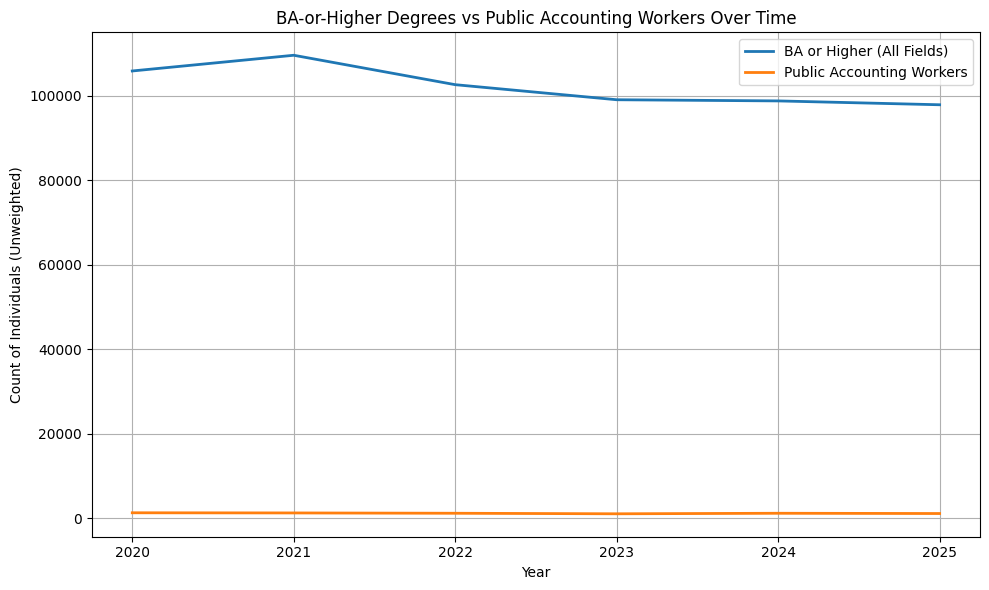

In [17]:
# --- 3. MERGE YEARLY TRENDS ---
trend = pd.merge(
    deg_counts,
    occ_counts,
    on="year",
    how="outer"   # keeps years that appear in either dataset
).sort_values("year")

print(trend.head())


# --- 4. PLOT THE LINES ---
plt.figure(figsize=(10, 6))

plt.plot(trend["year"], trend["ba_or_higher_degrees"],
         label="BA or Higher (All Fields)", linewidth=2)

plt.plot(trend["year"], trend["public_accounting_workers"],
         label="Public Accounting Workers", linewidth=2)

plt.title("BA-or-Higher Degrees vs Public Accounting Workers Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Individuals (Unweighted)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# Weighted BA-or-higher
deg_counts_w = (
    deg_ba.groupby("year")["asecwt"]
          .sum()
          .reset_index(name="ba_or_higher_weighted")
)

# Weighted public accounting workers
occ_counts_w = (
    occ_public.groupby("year")["wtsupp"]
              .sum()
              .reset_index(name="public_accounting_weighted")
)

trend_w = pd.merge(
    deg_counts_w,
    occ_counts_w,
    on="year",
    how="outer"
).sort_values("year")

plt.figure(figsize=(10, 6))
plt.plot(trend_w["year"], trend_w["ba_or_higher_weighted"],
         label="BA or Higher (Weighted)", linewidth=2)
plt.plot(trend_w["year"], trend_w["public_accounting_weighted"],
         label="Public Accounting Workers (Weighted)", linewidth=2)

plt.title("Weighted BA-or-Higher Degrees vs Public Accounting Workers Over Time")
plt.xlabel("Year")
plt.ylabel("Weighted Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: wtsupp'